In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns

python(31797) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [3]:
df = pd.read_csv('/Users/aravindrajeshmenon/Documents/DataScienceProjects/Projects/Recommender-Model/data/spotify_data.csv')
df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1159748 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159748 non-null  object 
 1   track_name        1159748 non-null  object 
 2   track_id          1159748 non-null  object 
 3   popularity        1159748 non-null  int64  
 4   year              1159748 non-null  int64  
 5   genre             1159748 non-null  object 
 6   danceability      1159748 non-null  float64
 7   energy            1159748 non-null  float64
 8   key               1159748 non-null  int64  
 9   loudness          1159748 non-null  float64
 10  mode              1159748 non-null  int64  
 11  speechiness       1159748 non-null  float64
 12  acousticness      1159748 non-null  float64
 13  instrumentalness  1159748 non-null  float64
 14  liveness          1159748 non-null  float64
 15  valence           1159748 non-null  float64
 16  tempo

In [20]:
df.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06
mean,1.838309e+01,2.011955e+03,5.374425e-01,6.396737e-01,5.287763e+00,-8.981292e+00,6.346560e-01,9.281520e-02,3.215380e-01,2.523423e-01,2.230197e-01,4.555689e-01,1.213775e+02,2.495587e+05,3.885880e+00
std,1.588563e+01,6.803908e+00,1.844753e-01,2.704993e-01,3.555204e+00,5.682203e+00,4.815267e-01,1.268416e-01,3.549873e-01,3.650701e-01,2.010712e-01,2.685169e-01,2.977964e+01,1.494243e+05,4.676983e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879800e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257405e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869070e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.dropna()


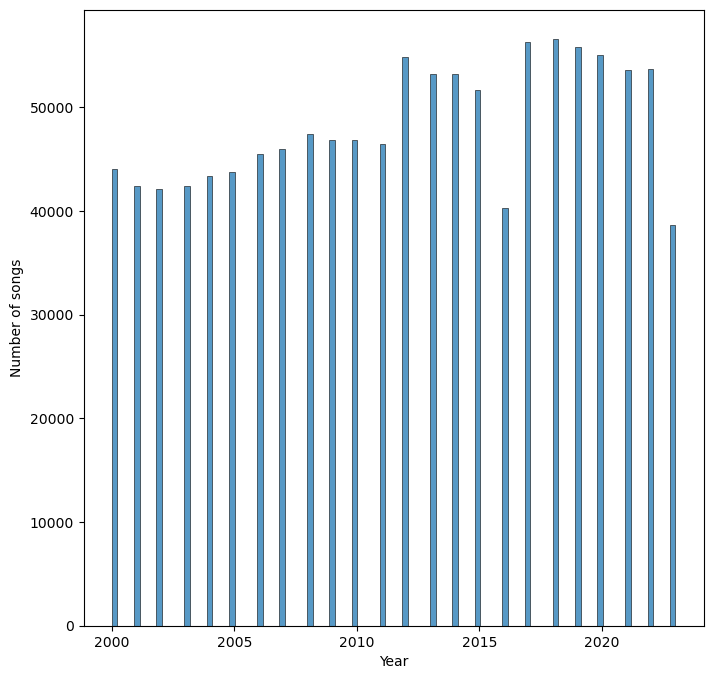

In [5]:
plt.figure(figsize = (8,8))
sns.histplot(data = df, x = 'year')
plt.xlabel('Year')
plt.ylabel('Number of songs')
plt.show()

We see that the songs are distributed pretty uniformly across the years with slight spikes in certain years. 

In [6]:
df['year'].value_counts()

year
2018    56565
2017    56238
2019    55788
2020    55066
2012    54797
2022    53692
2021    53566
2013    53216
2014    53179
2015    51607
2008    47432
2009    46869
2010    46868
2011    46444
2007    46001
2006    45474
2000    44034
2005    43779
2004    43390
2003    42368
2001    42351
2002    42102
2016    40273
2023    38649
Name: count, dtype: int64

In [11]:
genre_counts = df['genre'].value_counts().reset_index(name = 'count').head(30)

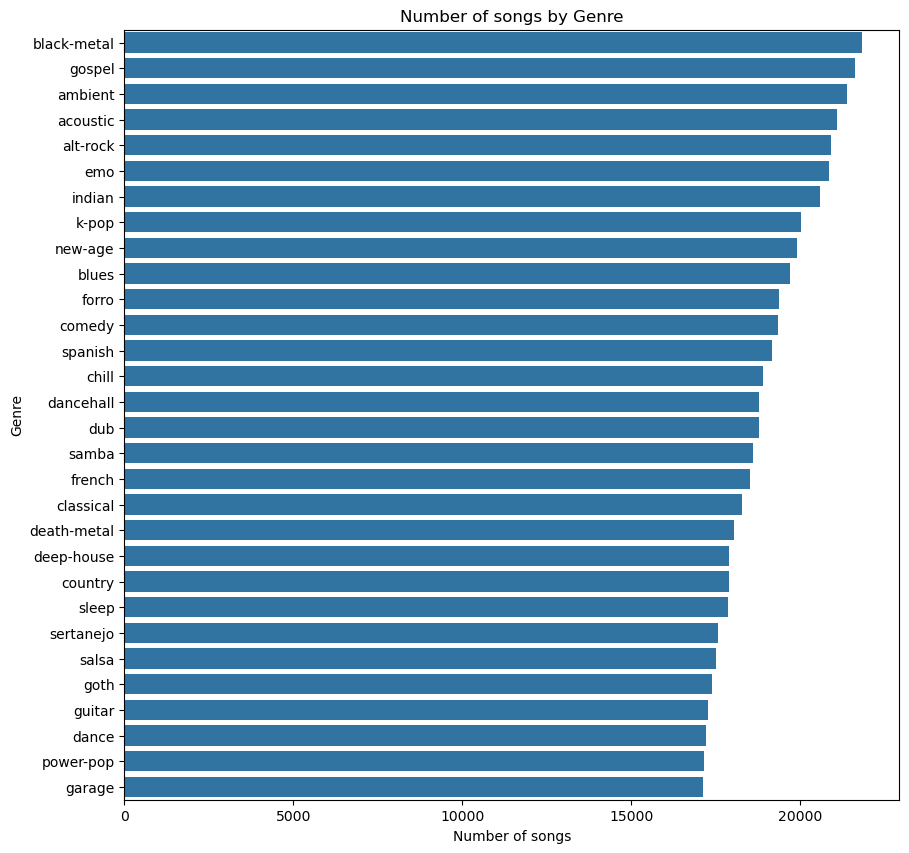

In [18]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'count', y = 'genre', data = genre_counts)
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.title('Number of songs by Genre')
plt.show()